# Notebook for CE802 Regression Task(P3)

In [81]:
# importing liraries for data importing and analysis
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [82]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Importing both train and test data 
train_data = pd.read_csv("CE802_P3_Data.csv")
test_data  = pd.read_csv("CE802_P3_Test.csv")

# Data Analysis

In the Data analysis we are going to perform the following steps.<br>
            <br>1. Statistical analysis of Features and labels<br> 
            <br>2. Missing values identification<br>
            <br>3. Data Distribution<br>
            <br>4. Outlier detection<br>
            <br>5. Correlation calculation<br>

In [84]:
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,193.83,UK,49.74,14.16,213.02,343.06,1753.44,-6.03,6.28,8,-5145.92,Low,11.35,1.01,1,68.92,51.16
1,1495.47,Europe,58.02,5.88,137.80,270.48,1665.33,-0.52,9.72,14,11145.82,High,10.30,0.30,5,89.30,0.00
2,1121.31,USA,68.85,9.18,209.54,295.26,3208.65,-4.00,3.86,6,31859.00,Medium,7.98,13.05,4,-11.80,2808.51
3,-305.49,USA,49.29,8.73,171.83,266.06,1704.18,-2.41,4.16,6,8075.76,Low,16.52,2.01,5,41.40,1092.21
4,1457.07,UK,64.98,7.92,74.10,260.22,1922.34,-11.97,5.00,18,9886.72,High,5.37,0.01,1,62.74,0.00


In [85]:
# Printing the train data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   object 
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   object 
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   int64  
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [86]:
# Observing the statistical information about the data
train_data.describe()

,F1,F3,F4,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,Target
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,668.60566,61.100000,12.124980,166.596867,234.403933,1154.974440,-4.494847,8.109187,7.885333,9254.683320,10.447127,63.602773,3.947333,27.028080,922.082533
std,904.26205,12.549426,8.681726,42.241393,59.715228,889.404292,3.040026,5.812853,3.620072,8886.071078,3.024250,774.154296,1.836702,58.613624,1092.331874
min,-2409.54000,-21.750000,0.120000,-114.370000,23.960000,-1827.360000,-14.560000,0.080000,0.000000,-31452.340000,1.020000,0.000000,0.000000,-177.880000,0.000000
25%,66.06000,55.425000,5.835000,146.597500,192.670000,547.087500,-6.450000,3.815000,6.000000,4782.300000,8.330000,0.130000,3.000000,-11.700000,0.000000
50%,657.85500,61.155000,10.245000,166.535000,234.310000,1146.495000,-4.390000,6.740000,8.000000,9252.570000,10.450000,1.010000,4.000000,28.640000,429.570000
75%,1295.82750,67.035000,16.477500,187.670000,274.500000,1769.992500,-2.515000,10.945000,10.000000,13343.520000,12.570000,6.805000,5.000000,66.320000,1530.205000
max,3821.25000,109.860000,70.170000,357.100000,471.840000,4347.660000,5.210000,45.140000,20.000000,48778.120000,19.470000,27474.530000,11.000000,206.400000,3960.010000


In [87]:
# Printing the sum of null values present in all features
train_data.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

There are no missing values in the training data no need of any kind of imputation

<AxesSubplot:xlabel='Target', ylabel='Density'>

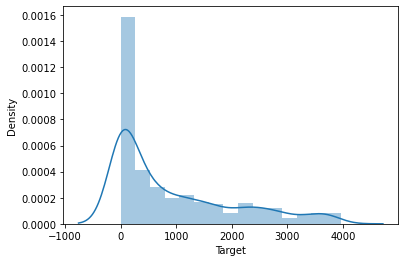

In [88]:
#plotting the distribution of the Traget variable
sns.distplot(train_data['Target'])

In [89]:
# Mean value of the target
train_data['Target'].mean()

922.0825333333336

Major of the target data is distributed between 0 to 1000 from the above graph.

Text(0.5, 1.0, 'F16 Distribution wrt Target')

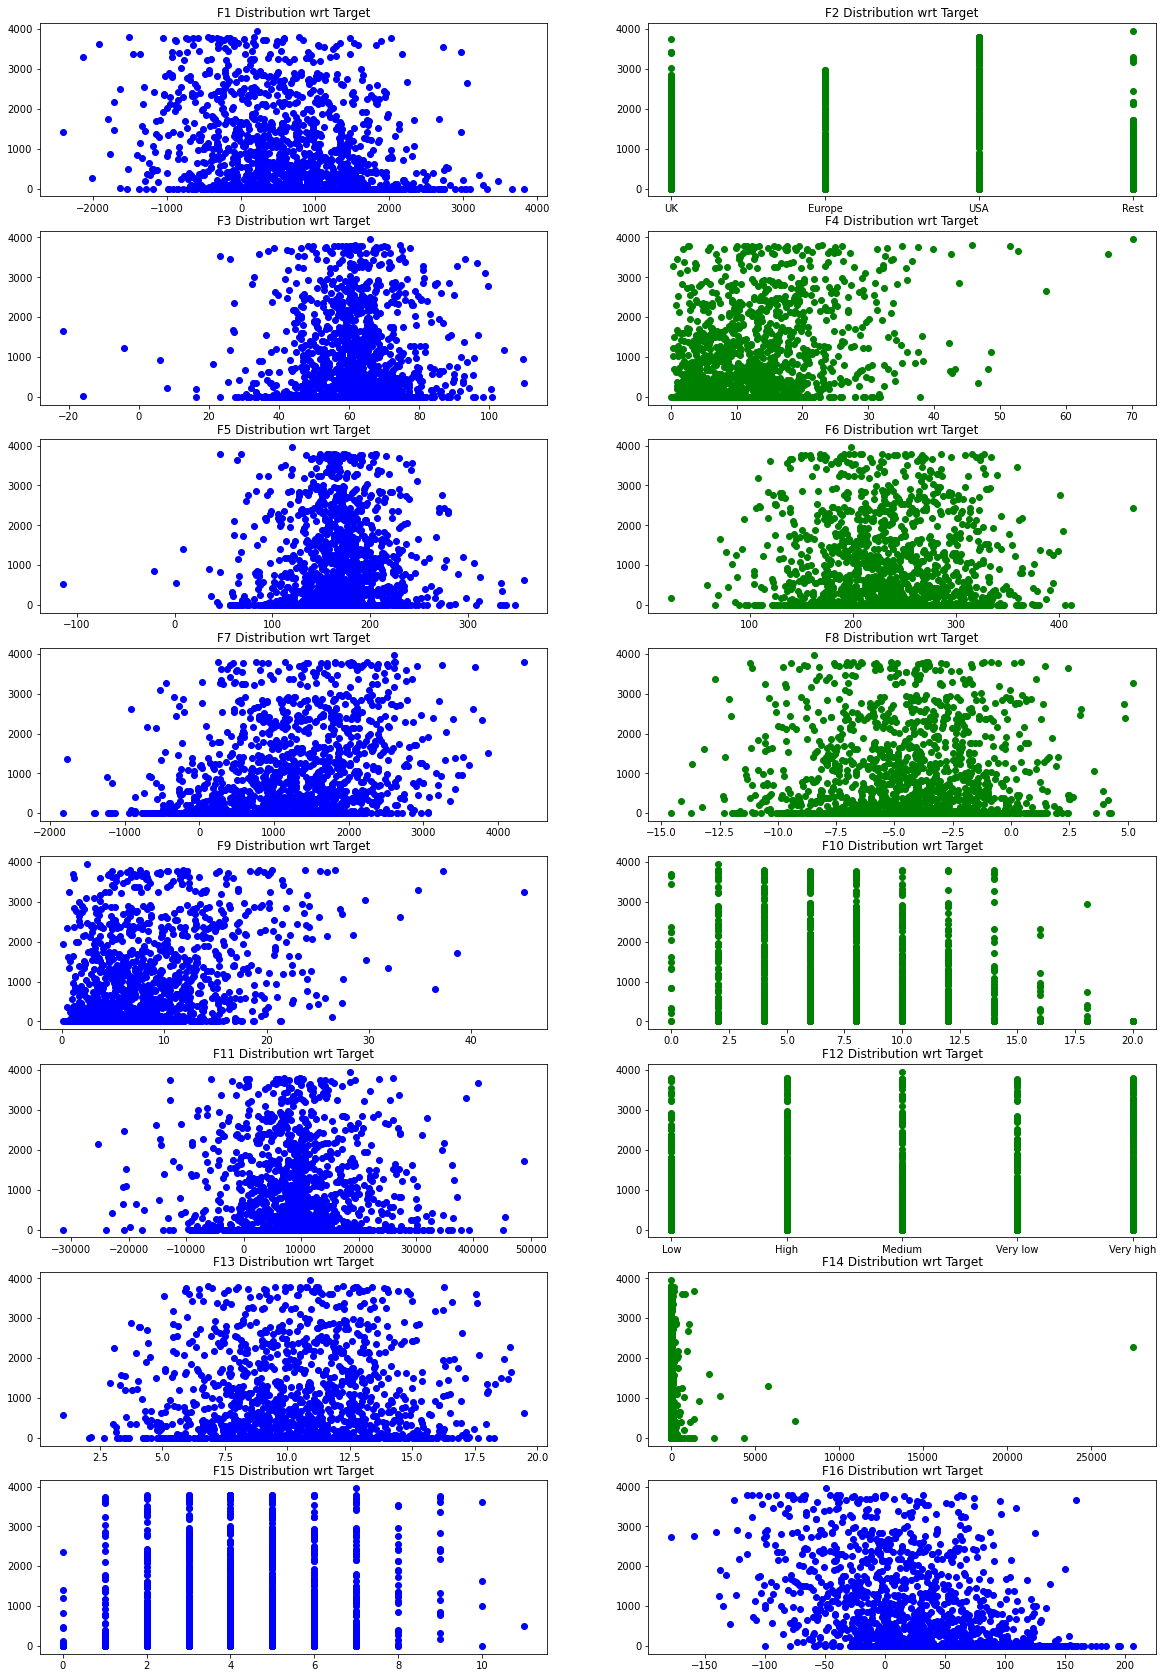

In [90]:
#Distribution of feature data wrt to Target
# Creating a figure with 8*2 grids for plots
fig, axs  = plt.subplots(8,2,figsize = [20,30])
# F1 feature distribution wrt to Traget
axs[0,0].plot(train_data.F1, train_data.Target,'o', color = 'blue')
axs[0,0].set_title('F1 Distribution wrt Target')
# F2 feature distribution wrt to Traget
axs[0,1].plot(train_data.F2, train_data.Target, 'o', color = 'green')
axs[0,1].set_title('F2 Distribution wrt Target')
# F3 feature distribution wrt to Traget
axs[1,0].plot(train_data.F3, train_data.Target,'o', color = 'blue')
axs[1,0].set_title('F3 Distribution wrt Target')
# F4 feature distribution wrt to Traget
axs[1,1].plot(train_data.F4, train_data.Target, 'o', color = 'green')
axs[1,1].set_title('F4 Distribution wrt Target')
# F5 feature distribution wrt to Traget
axs[2,0].plot(train_data.F5, train_data.Target,'o', color = 'blue')
axs[2,0].set_title('F5 Distribution wrt Target')
# F6 feature distribution wrt to Traget
axs[2,1].plot(train_data.F6, train_data.Target, 'o', color = 'green')
axs[2,1].set_title('F6 Distribution wrt Target')
# F7 feature distribution wrt to Traget
axs[3,0].plot(train_data.F7, train_data.Target,'o', color = 'blue')
axs[3,0].set_title('F7 Distribution wrt Target')
# F8 feature distribution wrt to Traget
axs[3,1].plot(train_data.F8, train_data.Target, 'o', color = 'green')
axs[3,1].set_title('F8 Distribution wrt Target')
# F9 feature distribution wrt to Traget
axs[4,0].plot(train_data.F9, train_data.Target,'o', color = 'blue')
axs[4,0].set_title('F9 Distribution wrt Target')
# F10 feature distribution wrt to Traget
axs[4,1].plot(train_data.F10, train_data.Target, 'o', color = 'green')
axs[4,1].set_title('F10 Distribution wrt Target')
# F11 feature distribution wrt to Traget
axs[5,0].plot(train_data.F11, train_data.Target,'o', color = 'blue')
axs[5,0].set_title('F11 Distribution wrt Target')
# F12 feature distribution wrt to Traget
axs[5,1].plot(train_data.F12, train_data.Target, 'o', color = 'green')
axs[5,1].set_title('F12 Distribution wrt Target')
# F13 feature distribution wrt to Traget
axs[6,0].plot(train_data.F13, train_data.Target,'o', color = 'blue')
axs[6,0].set_title('F13 Distribution wrt Target')
# F14 feature distribution wrt to Traget
axs[6,1].plot(train_data.F14, train_data.Target, 'o', color = 'green')
axs[6,1].set_title('F14 Distribution wrt Target')
# F15 feature distribution wrt to Traget
axs[7,0].plot(train_data.F15, train_data.Target,'o', color = 'blue')
axs[7,0].set_title('F15 Distribution wrt Target')
# F16 feature distribution wrt to Traget
axs[7,1].plot(train_data.F16, train_data.Target,'o', color = 'blue')
axs[7,1].set_title('F16 Distribution wrt Target')

<AxesSubplot:xlabel='F2', ylabel='Target'>

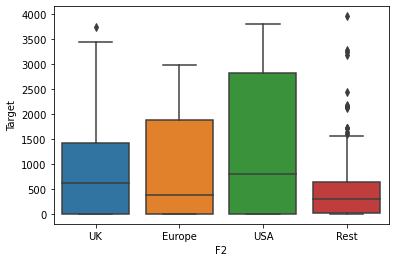

In [91]:
# The distribution of target with respect to each country
sns.boxplot(x = train_data['F2'],y = train_data['Target'])

<AxesSubplot:xlabel='F12', ylabel='Target'>

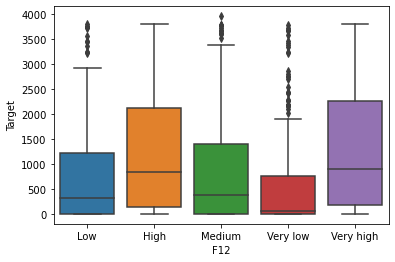

In [92]:
# The distribution of target with respect to priority
sns.boxplot(x = train_data['F12'],y = train_data['Target'])

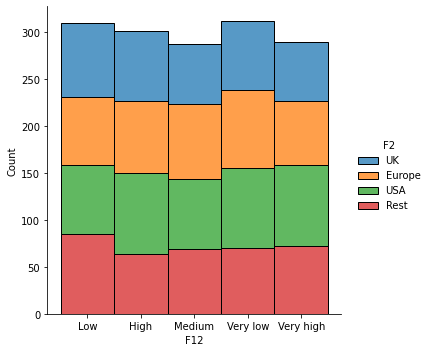

In [93]:
# The distribution of priority with respect to countries
sns.displot(train_data, x="F12", hue="F2",multiple="stack")

In [94]:
#Claculating Correlation between features and target
corr_matrix = train_data.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

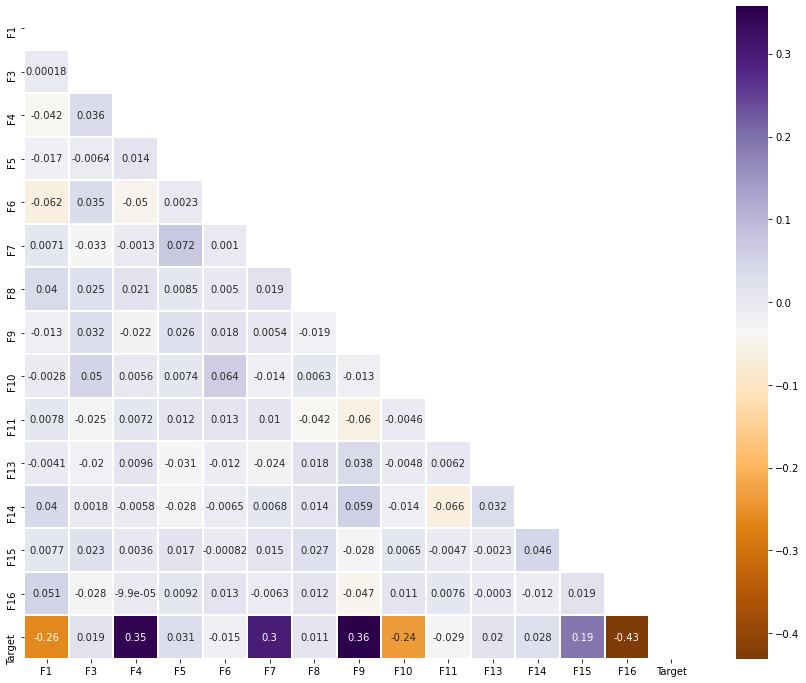

In [95]:
#PLotting Correlation heatmap
f,ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_matrix, annot = True, mask =mask,cmap='PuOr',linewidths=1.0,xticklabels=1, yticklabels=1)

In [96]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,596.16,Rest,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,Very high,9.24,0.69,3,45.06,NaN
1,1851.57,Europe,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,Medium,8.20,17.90,5,88.64,NaN
2,-945.60,USA,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,Very high,11.10,329.72,2,-41.36,NaN
3,1153.38,Europe,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,High,7.53,0.00,2,-91.60,NaN
4,-261.63,UK,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,High,8.99,360.26,4,154.32,NaN


In [97]:
# Printing the train data info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   object 
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   object 
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   int64  
 15  F16     1500 non-null   float64
 16  Target  0 non-null      float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [98]:
# Statistical information about the target
test_data.describe()

,F1,F3,F4,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,0.0
mean,659.320080,61.057400,12.036840,163.962547,235.157640,1153.539040,-4.607887,7.893467,8.064000,9505.032920,10.534933,92.631293,3.988667,27.310400,NaN
std,912.540536,13.568069,8.516715,44.551623,59.709182,905.304955,3.089368,5.597540,3.594698,8147.258071,3.019654,1121.181669,1.826498,61.036702,NaN
min,-2290.560000,-15.390000,0.120000,-25.720000,58.360000,-1734.720000,-14.380000,0.180000,0.000000,-41292.340000,1.650000,0.000000,0.000000,-192.900000,NaN
25%,58.755000,54.720000,5.760000,142.567500,193.915000,547.117500,-6.670000,3.760000,6.000000,5448.490000,8.497500,0.120000,3.000000,-11.400000,NaN
50%,666.510000,60.930000,10.110000,164.825000,237.130000,1136.235000,-4.530000,6.640000,8.000000,9348.440000,10.550000,0.900000,4.000000,29.300000,NaN
75%,1275.922500,67.387500,16.477500,187.570000,273.865000,1732.770000,-2.467500,10.685000,10.000000,13524.200000,12.562500,7.287500,5.000000,68.235000,NaN
max,4233.060000,129.570000,54.000000,373.430000,427.640000,4358.250000,6.470000,35.220000,20.000000,48324.480000,20.150000,36231.960000,11.000000,226.920000,NaN


In [99]:
# Printing the sum of null values present in all features
test_data.isnull().sum()

F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
Target    1500
dtype: int64

As observed there are no null values in test data as well. Only Target column is empty where predictions are to be made 

In [100]:
# Creating a copy of the test data before any transformation
test_data_copy = test_data

In [101]:
# Dropping Target column from test data 
test_data.drop('Target', inplace = True, axis=1)

In [102]:
# Moving Target to a separate variable from train data 
Target = pd.DataFrame(train_data['Target'])

In [103]:
# Dropping Target column from train data
train_data.drop('Target', inplace = True,axis = 1)

# Data Preprocessing

In [104]:
#Importing libraries needed for missing values imputation, data normalization and train test split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

In [105]:
# Splititng data into train(80%) and validation(20) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, Target, test_size=0.20, random_state=1)

In [106]:
# Data transformation for numeric featuers. creating a pipeline for missing data imputation with strategy as mean and data scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [107]:
### Data transformation for categorical featuers. 
# creating a pipeline for missing data imputation with strategy as most frequent and one hot encoding categorical features

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('Encoding', OneHotEncoder(handle_unknown='ignore'))])

In [108]:
# Creating a transformer object by numerical and categorical pipelines defined above. 
# The correct trnasformation is applied based on the data type of the feature
Scaler = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, selector(dtype_exclude="object")),
        ('cat', categorical_transformer, selector(dtype_include="object"))])

# Linear Regression Model

In [109]:
#Importing linear Regression from linear models and other cross validation & metrics libraries for best model selection
from sklearn import linear_model
from sklearn.model_selection import KFold,StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

In [110]:
# 5 fold cross validation definition 
cv = KFold(n_splits=5)

In [111]:
# Creating an Linear Regressor object
lin_est = linear_model.LinearRegression()

In [112]:
#Defining a pipe line for data trasnformation and linear regression model  
Linear_pipe = Pipeline(steps=[('scaler', Scaler), ('classifier', lin_est)])

In [113]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__fit_intercept' : [True,False],
    'classifier__normalize': [True,False],
    
}

In [114]:
# K fold crossvalidation grid search for the linear model to slecet best hyper parameters
Linear_grid = GridSearchCV(Linear_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [115]:
# Training the linear regression model 
Linear_grid = Linear_grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    3

In [116]:
print('\nBest R2 score : %.2f'%Linear_grid.best_score_, ' Best Params : ', str(Linear_grid.best_params_))


Best R2 score : 0.78  Best Params :  {'classifier__fit_intercept': True, 'classifier__normalize': False}


In [117]:
print('Coefficients of the model trained')
print(Linear_grid.best_estimator_['classifier'].coef_)

Coefficients of the model trained
[[-249.93261677   -3.32870358  362.86837199   -7.96936466    5.80797843
   304.1787038    26.49733564  386.05791423 -243.96253076  -11.71080746
    15.4609045     6.48846797  236.99471166 -431.42229714   76.77009937
  -427.10401012 -109.68517034  460.01908109  154.15418857 -152.58514527
   -22.1991272   316.68079658 -296.05071268]]


In [118]:
# Saving best Trainig score into a dictonary varaible
Training_score = {'Linear_Reg': Linear_grid.best_score_}

In [119]:
# Making Predictions on the test data and comparing with the original values 
print(Linear_grid.best_estimator_.score(X_test,y_test))
Validation_score = {'Linear_Reg':Linear_grid.best_estimator_.score(X_test,y_test)}

0.8057565411297372


In [120]:
# Making Predictions on the test data 
y_lin_pred = Linear_grid.best_estimator_.predict(X_test)

In [177]:
SSE= 0
arr = np.array(y_test)
for col in range(len(y_mlp_pred)):
    SSE =  SSE +(arr[col] - y_lin_pred[col])**2
print('Sum of square error Linear Regression', SSE)
rms = (SSE/len(y_mlp_pred))**0.5
print('RMSE error LInear Regression', rms)

Sum of square error Linear Regression [78117653.0163945]
RMSE error LInear Regression [510.28636737]


Text(0, 0.5, 'Predicted Values')

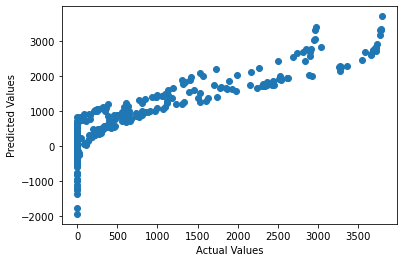

In [122]:
# Plotting the predicted values against against actual values.
plt.subplot(1,1,1)
plt.plot(y_test,y_lin_pred,'o')
plt.subplot(1,1,1).set_xlabel('Actual Values')
plt.subplot(1,1,1).set_ylabel('Predicted Values')

from the graph above a lot of predictions are in negative range where the actual values never go below zero.

# Random Forest Regressor

In [123]:
# Importing the random forest regressor from ensembler library
from sklearn.ensemble import RandomForestRegressor

In [124]:
# creating an object for the random forget regressor
Rf_est = RandomForestRegressor()

In [125]:
#Defining a pipe line for data trasnformation and random forest regression model
RF_pipe = Pipeline(steps=[('scaler', Scaler), ('classifier', Rf_est)])

In [126]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__n_estimators' : np.arange(10,100,10),
    'classifier__max_depth': np.arange(9,16,3),
    'classifier__criterion':['mse'],
    'classifier__min_samples_split':np.arange(2,20,4),
    
}

In [127]:
# K fold crossvalidation grid search for the random forest model to slecet best hyper parameters
RF_grid = GridSearchCV(RF_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [128]:
# Training the random forest regression model
RF_grid = RF_grid.fit(X_train,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   41.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  1.8min finished


In [129]:
print('\nBest R2 score : %.2f'%RF_grid.best_score_, ' Best Params : ', str(RF_grid.best_params_))


Best R2 score : 0.65  Best Params :  {'classifier__criterion': 'mse', 'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 80}


In [130]:
# Saving best Trainig score into a dictonary varaible
Training_score['Random_Forest'] = RF_grid.best_score_

In [131]:
# Making Predictions on the test data and comparing with the original values
print(RF_grid.best_estimator_.score(X_test,y_test))
Validation_score['Random_Forest'] = RF_grid.best_estimator_.score(X_test,y_test)

0.7310695538791394


In [132]:
# Making Predictions on the test data
y_RF_pred = RF_grid.best_estimator_.predict(X_test)

In [178]:
SSE= 0
arr = np.array(y_test)
for col in range(len(y_mlp_pred)):
    SSE =  SSE +(arr[col] - y_RF_pred[col])**2
print('Sum of square error Random Forest', SSE)
rms = (SSE/len(y_mlp_pred))**0.5
print('RMSE error Random Forest', rms)


Sum of square error Random Forest [1.08154042e+08]
RMSE error Random Forest [600.42774293]


Text(0, 0.5, 'Predicted Values')

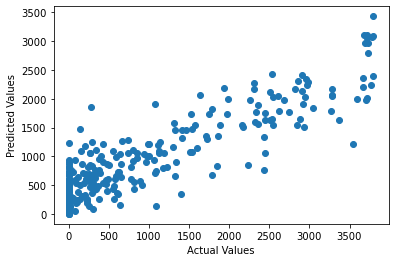

In [134]:
# Plotting the predicted values against against actual values
plt.subplot(1,1,1)
plt.plot(y_test,y_RF_pred,'o')
plt.subplot(1,1,1).set_xlabel('Actual Values')
plt.subplot(1,1,1).set_ylabel('Predicted Values')

As you can see the predictions are all over the place where we are expecting a linear line with increasing gradient. But it is not making any negative predictions

# Support Vector Machine Regressor 

In [135]:
#Importig the SVR estimator from the SVM library
from sklearn.svm import SVR

In [136]:
# creating an object for the SVR estimator 
svm_est = SVR()

In [137]:
#Defining a pipe line for data trasnformation and SVR model
svm_pipe = Pipeline(steps=[('scaler', Scaler), ('classifier', svm_est)])

In [138]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__kernel':['rbf','sigmoid','linear'],
    'classifier__C' : [0.1,1,10,50,100,250,500,750,1000,2000,3500,5000],
    'classifier__gamma': np.logspace(-5,5,8),
    'classifier__epsilon': [0.01,0.1,0.2,0.5,0.75]
    
}

In [139]:
# K fold crossvalidation grid search for the SVR model to slecet best hyper parameters
svm_grid = GridSearchCV(svm_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [140]:
# Training the SVR model
svm_grid = svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1465s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 

[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   10.7s
[Paralle

[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   20.4s
[Paralle

[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:   31.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 1090 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1324 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:   52.3s
[Parallel(n_jobs=-1)]: Done 1350 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 1354 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1602 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1606 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1610 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1612 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1614 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1618 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1620 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1852 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1854 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1858 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1870 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1872 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1874 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1876 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1878 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1882 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2114 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2116 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2118 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2126 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2132 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2134 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2382 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2388 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2390 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2392 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2394 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2398 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2400 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2404 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2406 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2408 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2410 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2646 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2650 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2652 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2654 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2656 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2658 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2660 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2662 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2666 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2668 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2670 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2672 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2674 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2914 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2916 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2918 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2922 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2924 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2926 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2928 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2930 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2932 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2934 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2938 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2942 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3178 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3182 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3186 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3190 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3194 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3198 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3202 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3204 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3206 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3438 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3440 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3444 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3446 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3448 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3450 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3452 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3454 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3458 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3460 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3462 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3466 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3468 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3702 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3704 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3706 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3708 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3710 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3714 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3716 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3718 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3720 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3722 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3724 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3726 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3730 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3732 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3970 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3972 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3976 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3978 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3980 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3982 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3988 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3990 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3994 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3996 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3998 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4228 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4230 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4232 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4234 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4236 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4238 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4240 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4241 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4242 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4243 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4244 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4245 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4247 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4249 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4366 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4367 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4369 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4370 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4371 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4372 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4373 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4374 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4375 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4376 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4377 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4378 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4379 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4380 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4381 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4497 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4498 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4499 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4500 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4501 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4502 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4503 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4504 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4505 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4506 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4507 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4508 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4509 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4510 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4511 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 4512 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4628 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4629 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4630 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4631 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4633 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4634 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4635 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4636 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4637 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4638 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4639 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4641 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4642 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4643 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4764 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4765 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4766 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4767 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4768 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4769 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4770 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4771 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4772 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4773 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4774 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4775 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4776 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4777 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4778 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4779 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4898 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4899 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4900 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4901 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4902 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4903 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4904 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4905 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4906 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4907 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4908 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4909 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4910 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4911 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4912 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5028 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5029 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5030 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5031 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5032 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5033 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5034 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5035 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5036 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5037 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5038 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5039 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5040 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5041 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5043 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5161 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5162 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5163 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5164 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5165 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5166 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5167 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5168 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5169 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5170 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5171 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5173 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5174 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5175 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5291 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5292 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5293 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5294 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5295 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5296 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5297 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5298 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5299 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5300 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5301 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5302 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5303 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5304 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5305 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 5306 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5423 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5425 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5426 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5427 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 5428 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5429 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5430 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5431 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5432 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5433 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5434 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5435 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5436 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5437 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5438 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5555 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5556 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5557 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5558 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5559 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5560 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5561 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 5562 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5563 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5564 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5565 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5566 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5567 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5568 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5569 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 5570 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5687 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5689 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5690 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5691 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5692 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5693 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5694 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5695 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5696 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5697 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5698 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5699 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5700 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5701 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 5702 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5818 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5819 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5820 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5821 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5822 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5823 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5825 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5826 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5827 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5829 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5830 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5831 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 5832 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 5833 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 5951 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5952 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5953 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5954 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5955 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5956 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5957 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5958 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5959 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5960 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5961 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5962 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5963 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5964 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5965 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5966 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6084 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 6085 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6086 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6087 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6088 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6089 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6090 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6091 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6092 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6093 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6094 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6095 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6096 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6097 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6098 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6099 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6218 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6219 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6220 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 6221 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6222 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6223 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6224 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6225 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6226 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6227 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6228 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6229 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6230 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6231 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6232 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6233 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6350 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6351 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6353 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6354 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6355 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 6356 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6357 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6358 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6359 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6360 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6361 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6362 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6363 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6364 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 6365 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6482 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6483 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6484 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6485 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6486 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6487 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6488 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6489 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6490 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6491 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6492 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6493 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6494 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6495 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6496 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 6497 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6615 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6616 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6617 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6618 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6619 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6620 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6621 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6622 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6623 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6624 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 6625 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6626 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6627 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6628 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6629 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 6630 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6746 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6747 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6748 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6749 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6750 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6751 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6752 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6753 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6754 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6755 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6756 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6757 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6758 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6759 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 6761 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 6879 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 6880 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 6881 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6882 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6883 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6884 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6885 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6886 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6887 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6888 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6889 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6890 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6891 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6892 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6893 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 6894 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7012 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 7013 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 7014 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 7015 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7016 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7017 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7018 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7019 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7020 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7021 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7022 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7023 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7024 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7025 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7026 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 7027 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 7143 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7144 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7145 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7146 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7147 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7148 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 7149 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7150 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7151 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7152 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7153 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7154 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7155 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7156 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7157 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 7158 tasks      | elapsed: 

In [141]:
print('\nBest R2 score : %.2f'%svm_grid.best_score_, ' Best Params : ', str(svm_grid.best_params_))


Best R2 score : 0.85  Best Params :  {'classifier__C': 5000, 'classifier__epsilon': 0.01, 'classifier__gamma': 0.0071968567300115215, 'classifier__kernel': 'rbf'}


In [142]:
# Saving best Trainig score into a dictonary varaible
Training_score['SVM_Regressor'] = svm_grid.best_score_

In [143]:
# Making Predictions on the test data and comparing with the original values
print(svm_grid.best_estimator_.score(X_test,y_test))
Validation_score['SVM_Regressor'] = svm_grid.best_estimator_.score(X_test,y_test)

0.8673463734722272


In [144]:
# Making Predictions on the test data
y_svm_pred = svm_grid.best_estimator_.predict(X_test)

In [179]:
SSE= 0
arr = np.array(y_test)
for col in range(len(y_mlp_pred)):
    SSE =  SSE +(arr[col] - y_svm_pred[col])**2
print('Sum of square error SVE', SSE)
rms = (SSE/len(y_mlp_pred))**0.5
print('RMSE error SVE', rms)

Sum of square error SVE [53348462.9481614]
RMSE error SVE [421.69682217]


Text(0, 0.5, 'Predicted Values')

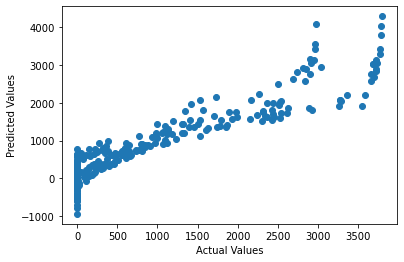

In [146]:
# Plotting the predicted values against against actual values
plt.subplot(1,1,1)
plt.plot(y_test,y_svm_pred,'o')
plt.subplot(1,1,1).set_xlabel('Actual Values')
plt.subplot(1,1,1).set_ylabel('Predicted Values')

Almost similar results as Linear regressor model but with a little better accuracy

# MLP Regressor

In [147]:
#importing MLPRegressor from the sklearn neural network library
from sklearn.neural_network import MLPRegressor

In [148]:
# creating an object for the MLPRegressor estimator
mlp_est = MLPRegressor()

In [149]:
#Defining a pipe line for data trasnformation and MLPRegressor model
mlp_pipe = Pipeline(steps=[('scaler', Scaler), ('classifier', mlp_est)])

In [150]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__hidden_layer_sizes':np.arange(25,100,15),
    'classifier__activation' : ['relu','logistic'],
    'classifier__learning_rate' :['constant', 'adaptive'],
    'classifier__learning_rate_init' : [0.1,0.3,0.4,0.5,0.6,0.8],
    'classifier__early_stopping' : [True],
    'classifier__random_state' : [7]
    
}

In [151]:
# K fold crossvalidation grid search for the MLPRegressor model to slecet best hyper parameters
mlp_grid = GridSearchCV(mlp_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [152]:
# Training the MLPRegressor model
mlp_grid = mlp_grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.1s
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   37.5s
[Paralle

[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  1.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  1.6min
[Paralle

In [153]:
print('\nBest Train R2 score : %.2f'%mlp_grid.best_score_, ' Best Params : ', str(mlp_grid.best_params_))


Best Train R2 score : 0.99  Best Params :  {'classifier__activation': 'relu', 'classifier__early_stopping': True, 'classifier__hidden_layer_sizes': 25, 'classifier__learning_rate': 'constant', 'classifier__learning_rate_init': 0.6, 'classifier__random_state': 7}


In [154]:
# Saving best Trainig score into a dictonary varaible
Training_score['MLP_Regressor'] = mlp_grid.best_score_

In [155]:
# Making Predictions on the test data and comparing with the original values
print('Validation R2 Score',mlp_grid.best_estimator_.score(X_test,y_test))
Validation_score['MLP_Regressor'] = mlp_grid.best_estimator_.score(X_test,y_test)

Validation R2 Score 0.9928549945190488


In [156]:
# Making Predictions on the test data
y_mlp_pred = mlp_grid.best_estimator_.predict(X_test)

In [180]:
SSE = 0
arr = np.array(y_test)
for col in range(len(y_mlp_pred)):
    SSE =  SSE +(arr[col] - y_mlp_pred[col])**2
print('Sum of squares error MLP Regressor', SSE)
rms = (SSE/len(y_mlp_pred))**0.5
print("RMS error MLP Regressor",rms)


Sum of squares error MLP Regressor [2873461.28516987]
RMS error MLP Regressor [97.86830071]


In [158]:
print(metrics.mean_squared_error(y_test,y_mlp_pred))

9578.204283899579


Text(0, 0.5, 'Predicted Values')

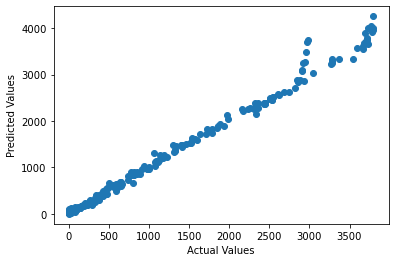

In [159]:
# Plotting the predicted values against against actual values
plt.subplot(1,1,1)
plt.plot(y_test,y_mlp_pred,'o')
plt.subplot(1,1,1).set_xlabel('Actual Values')
plt.subplot(1,1,1).set_ylabel('Predicted Values')

# Metrics Comparision

Text(0.5, 1.0, 'Validation R2_score')

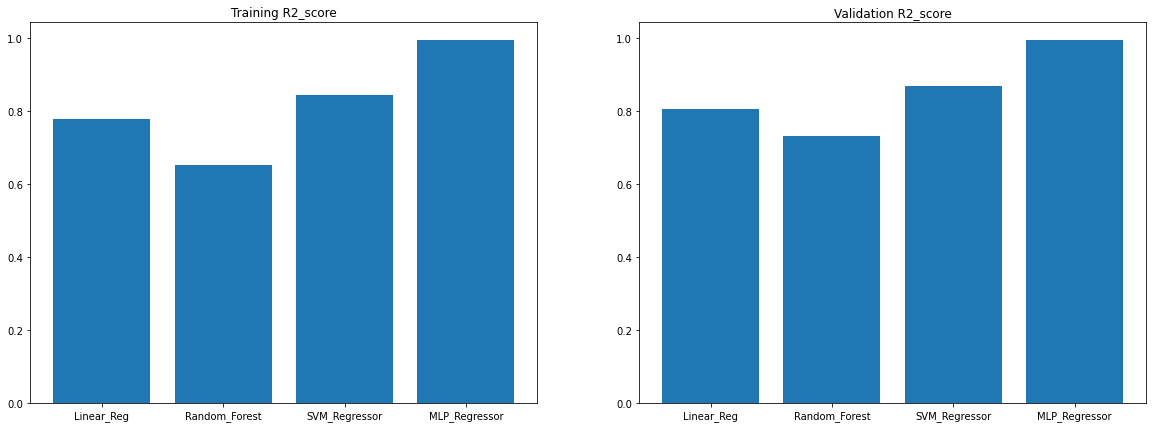

In [160]:
# PLotting best train and test accuracies of all the models trained 
plt.subplots(1,2,figsize= (20,7))
# Plotting best train accuracry achieved by each classification algorithm
plt.subplot(1,2,1)
plt.bar(Training_score.keys(),Training_score.values())
plt.subplot(1,2,1).set_title('Training R2_score')
# Plotting best test accuracry achieved by each classification algorithm
plt.subplot(1,2,2)
plt.bar(Validation_score.keys(),Validation_score.values())
plt.subplot(1,2,2).set_title('Validation R2_score')

From the above graphs the mlp regressor peformed better than other algorithms during both training and validation phases. Also th rmse error on prediction of validation data is less for mlp only with 0.7. 

# Predictions on Test Data

In [161]:
# Making Predictions for the test data
Test_Target_values = mlp_grid.best_estimator_.predict(test_data)

In [162]:
Test_Target_values2 = svm_grid.best_estimator_.predict(test_data)

<AxesSubplot:ylabel='Density'>

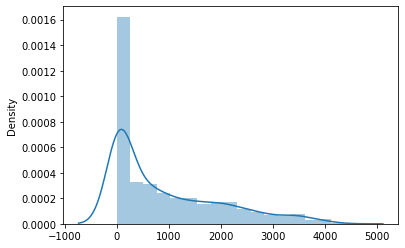

In [163]:
#plotting the distribution of the predicted Traget variable
sns.distplot(Test_Target_values)

<AxesSubplot:ylabel='Density'>

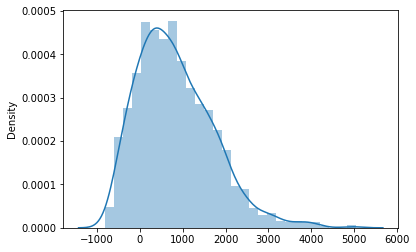

In [164]:
#plotting the distribution of the predicted Traget variable
sns.distplot(Test_Target_values2)

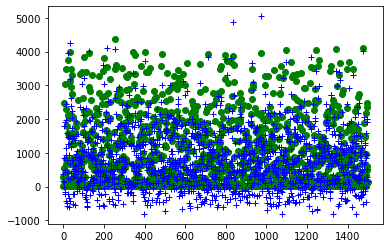

In [165]:
plt.plot(Test_Target_values, 'o', color ='green')
plt.plot(Test_Target_values2, '+', color ='blue')

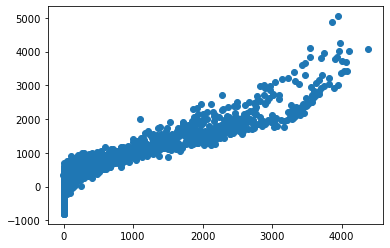

In [166]:
plt.plot(Test_Target_values,Test_Target_values2,'o')

In [168]:
metrics.r2_score(Test_Target_values,Test_Target_values2)

0.8752509110513547

In [169]:
# Adding the predictions to the copy of the test data
test_data_copy['Target'] = Test_Target_values

In [170]:
test_data_copy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,596.16,Rest,72.24,6.00,154.48,184.18,226.65,-8.21,18.46,10,6547.48,Very high,9.24,0.69,3,45.06,273.328909
1,1851.57,Europe,63.09,10.47,200.93,183.48,1101.51,-7.91,3.76,4,-983.62,Medium,8.20,17.90,5,88.64,5.784554
2,-945.60,USA,71.22,8.25,190.35,243.96,924.93,-6.35,2.48,6,-2366.10,Very high,11.10,329.72,2,-41.36,2470.269502
3,1153.38,Europe,62.52,7.41,165.21,245.64,1017.09,-5.84,6.58,14,-503.06,High,7.53,0.00,2,-91.60,540.975194
4,-261.63,UK,60.87,10.14,201.96,216.28,1350.96,-2.75,4.02,6,19521.62,High,8.99,360.26,4,154.32,11.771066


In [176]:
# Saving the new test data with predictions to csv file
test_data_copy.to_csv('output\CE802_P3_Test.csv', index = False)